In [1]:
import datetime
from gensim import corpora, models, similarities
import math
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import *
import numpy as np
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import string

In [2]:
tweets = pd.read_csv("./data/london_tweets.csv", encoding="latin1")

In [3]:
tweets.head()

,id,Name,X,Y,LONGITUDE,LATITUDE,MESSAGEDATE,USERID,USERSCREENNAME,MESSAGETEXT,LOCATION,HASHTAGS,ISRETWEET
0,550226818624942080,NaN,-0.262150,51.391407,-0.262150,51.391407,31/12/2014 09:47:50,113918054,12Elbestreet,@julieo25 Not yet got tics for Liverpool waiti...,Kingston upon Thames,NaN,0
1,550226827944660992,NaN,-0.014891,51.354042,-0.014891,51.354042,31/12/2014 09:47:53,55872342,MissGee_Pee,If it doesn't make you happy by December 31st....,Croydon,NaN,0
2,550226837537058816,NaN,0.006698,51.532020,0.006698,51.532021,31/12/2014 09:47:55,147266450,vinita_ramtri,@westfieldstrat thanks; and are you open tomor...,Newham,NaN,0
3,550227214227505152,NaN,0.214417,51.582535,0.214417,51.582535,31/12/2014 09:49:25,518928608,CallumGordon7,@WestHam_Central but he is,Havering,NaN,0
4,550227602011856896,NaN,-0.104869,51.509530,-0.104869,51.509529,31/12/2014 09:50:57,151094999,HevnKISZ,@JJJ_Jeeppy >> # XD,Southwark,,0


In [7]:
total_by_borough = tweets.groupby("LOCATION")["id"].agg("count").reset_index()

In [8]:
total_by_borough.head()

,LOCATION,id
0,Barking and Dagenham,2035
1,Barnet,4290
2,Bexley,2794
3,Brent,2585
4,Bromley,3626


In [9]:
lower_q = total_by_borough.id.quantile(0.25)
median = total_by_borough.id.quantile(0.5)
upper_q = total_by_borough.id.quantile(0.75)

In [10]:
total_by_borough.id.quantile([0.25,0.5,0.75, 1.0])

0.25    2166.0
0.50    2936.0
0.75    3765.0
1.00    4817.0
Name: id, dtype: float64

In [12]:
total_by_borough.min()

LOCATION    Barking and Dagenham
id                          1062
dtype: object

In [13]:
total_by_borough.to_csv("./data/total_tweets_by_borough.csv", index=False)

In [14]:
iqr = total_by_borough.id.quantile(0.75) - total_by_borough.id.quantile(0.25)

In [15]:
iqr

1599.0

In [16]:
total_by_borough.id.quantile(0.25) - 1.5*iqr

-232.5

In [20]:
total_by_borough.id.quantile(0.75) + 1.5*iqr

6163.5

In [18]:
total_by_borough["quartile"] = np.nan

In [19]:
total_by_borough.head()

,LOCATION,id,quartile
0,Barking and Dagenham,2035,NaN
1,Barnet,4290,NaN
2,Bexley,2794,NaN
3,Brent,2585,NaN
4,Bromley,3626,NaN


In [22]:
first_quartile = total_by_borough.id.quantile(0.25)
second_quartile = total_by_borough.id.quantile(0.5)
third_quartile = total_by_borough.id.quantile(0.75)
fourth_quartile = total_by_borough.id.quantile(1.00)

In [23]:
def tweets_by_quartile(tweets):
    
    if tweets <= first_quartile:
        return "First Quartile"
    elif tweets <= second_quartile:
        return "Second Quartile"
    elif tweets <= third_quartile:
        return "Third Quartile"
    elif tweets <= fourth_quartile:
        return "Fourth Quartile"

In [26]:
total_by_borough.quartile = total_by_borough.id.apply(tweets_by_quartile)

In [27]:
total_by_borough.head()

,LOCATION,id,quartile
0,Barking and Dagenham,2035,First Quartile
1,Barnet,4290,Fourth Quartile
2,Bexley,2794,Second Quartile
3,Brent,2585,Second Quartile
4,Bromley,3626,Third Quartile


In [28]:
total_by_borough.to_csv("./data/tweets_by_quartile.csv", index=False)

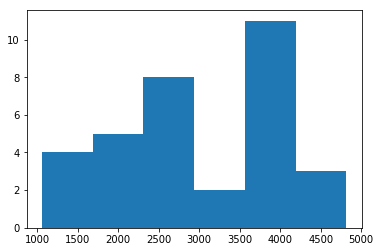

In [49]:
import matplotlib.pyplot as plt

n, bins, patches = plt.hist(total_by_borough.id, 6)

In [48]:
np.sqrt(32)

5.656854249492381

In [50]:
tweets.groupby("Cluster")

KeyError: 'Cluster'